In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
hof_data = pd.read_csv('gdrive/My Drive/NBA Career HOF Player Data.csv')

In [70]:
hof_data

,Unnamed: 0,Player,Eligible,Position,Hall_of_Fame,MVP,Finals_MVP,NBA_Champ,All_NBA,All_Defensive,...,TS%_advanced,OWS_advanced,DWS_advanced,WS_advanced,WS/48_advanced,OBPM_advanced,DBPM_advanced,BPM_advanced,VORP_advanced,peak_ws_advanced
0,0,Alaa Abdelnaby,1,PowerForward,0,0,0,0,0,0,...,0.532,0.7,4.1,4.8,0.072,-2.9,-0.9,-3.8,-1.5,2.1
1,1,Zaid Abdul-Aziz,1,Center,0,0,0,0,0,0,...,0.479,5.9,11.6,17.5,0.076,0.6,-0.2,0.4,2.7,6.5
2,2,Kareem Abdul-Jabbar,1,Center,1,6,2,6,15,11,...,0.592,178.9,94.5,273.4,0.228,4.1,1.6,5.7,85.7,25.4
3,3,Mahmoud Abdul-Rauf,1,PointGuard,0,0,0,0,0,0,...,0.506,16.7,8.4,25.2,0.077,0.7,-1.5,-0.8,4.5,6.8
4,4,Tariq Abdul-Wahad,1,ShootingGuard,0,0,0,0,0,0,...,0.467,-0.6,4.1,3.5,0.035,-2.6,-0.4,-3.0,-1.2,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,5057,Jim Zoet,1,Center,0,0,0,0,0,0,...,0.200,-0.1,0.0,-0.1,-0.123,-5.6,0.2,-5.4,-0.1,-0.1
5058,5058,Bill Zopf,1,PointGuard,0,0,0,0,0,0,...,0.391,-0.5,0.4,-0.1,-0.011,-999.0,-999.0,-999.0,-999.0,-0.1
5059,5059,Ivica Zubac,0,Center,0,0,0,0,0,0,...,0.641,20.2,12.6,32.8,0.175,-0.1,0.3,0.3,5.1,7.2
5060,5060,Matt Zunic,1,Guard/Forward,0,0,0,0,0,0,...,0.368,0.2,1.8,2.0,NaN,-999.0,-999.0,-999.0,-999.0,2.0


In [71]:
cat_cols = hof_data.select_dtypes(include=['object']).columns.tolist()

In [72]:
hof_data = pd.get_dummies(hof_data, columns = ["Position"])

In [74]:
hof_data = hof_data.rename(columns = {"Unnamed: 0": "player_id"})

In [75]:
player_map = hof_data[['player_id', 'Player']]

In [76]:
hof_data_2 = hof_data.drop(columns = ['player_id', 'Player'])

In [78]:
hof_data_2

,Eligible,Hall_of_Fame,MVP,Finals_MVP,NBA_Champ,All_NBA,All_Defensive,Def_POY,All_Star,Scoring_Champ,...,Position_Center/Forward,Position_Forward,Position_Forward/Center,Position_Forward/Guard,Position_Guard,Position_Guard/Forward,Position_PointGuard,Position_PowerForward,Position_ShootingGuard,Position_SmallForward
0,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,6,2,6,15,11,0,19,2,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5058,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
5059,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5060,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [148]:
hof_data_2.fillna(hof_data_2.mean())

,Eligible,Hall_of_Fame,MVP,Finals_MVP,NBA_Champ,All_NBA,All_Defensive,Def_POY,All_Star,Scoring_Champ,...,Position_Center/Forward,Position_Forward,Position_Forward/Center,Position_Forward/Guard,Position_Guard,Position_Guard/Forward,Position_PointGuard,Position_PowerForward,Position_ShootingGuard,Position_SmallForward
0,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,6,2,6,15,11,0,19,2,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5058,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
5059,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5060,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [149]:
hof_data_elig = hof_data_2[hof_data_2['Eligible'] == 1].drop(columns = ['Eligible'])
not_elig = hof_data_2[hof_data_2['Eligible'] == 0].drop(columns = ['Eligible'])

In [150]:
X = hof_data_elig.drop(columns = ["Hall_of_Fame"])

In [84]:
y = hof_data_elig[["Hall_of_Fame"]]

In [85]:
y

,Hall_of_Fame
0,0
1,0
2,1
3,0
4,0
...,...
5055,0
5057,0
5058,0
5060,0


# Introduction

As an avid basketball fan, I wanted to conduct my research on what factors are most important in deciding whether a player enters the Naismith Hall of Fame.

# EDA

In [37]:
train

,Hall_of_Fame,MVP,Finals_MVP,NBA_Champ,All_NBA,All_Defensive,Def_POY,All_Star,Scoring_Champ,TRB_Champ,...,Position_Center/Forward,Position_Forward,Position_Forward/Center,Position_Forward/Guard,Position_Guard,Position_Guard/Forward,Position_PointGuard,Position_PowerForward,Position_ShootingGuard,Position_SmallForward
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,6,2,6,15,11,0,19,2,1,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
5057,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5058,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
5060,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


## Correlation Heatmaps

<Figure size 1800x1500 with 0 Axes>

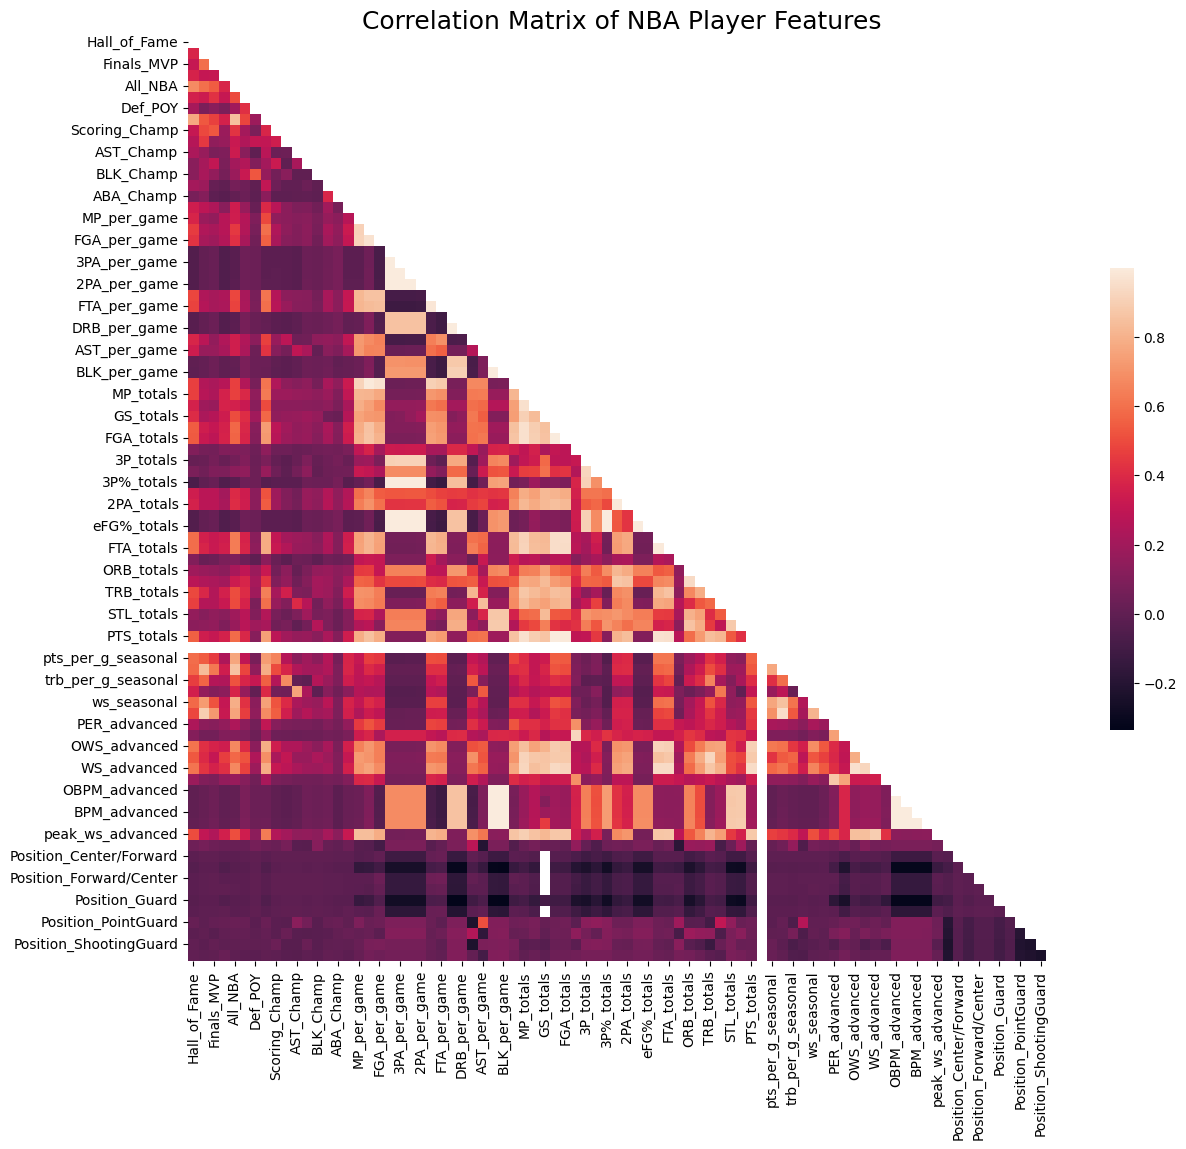

In [38]:
plt.figure(figsize=(18,15))
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14,12))

sns.heatmap(corr, mask=mask, fmt=".2f", cbar_kws = {"shrink": .5})
plt.title('Correlation Matrix of NBA Player Features', fontsize=18)
plt.show()

<ipython-input-39-72a892cde609>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




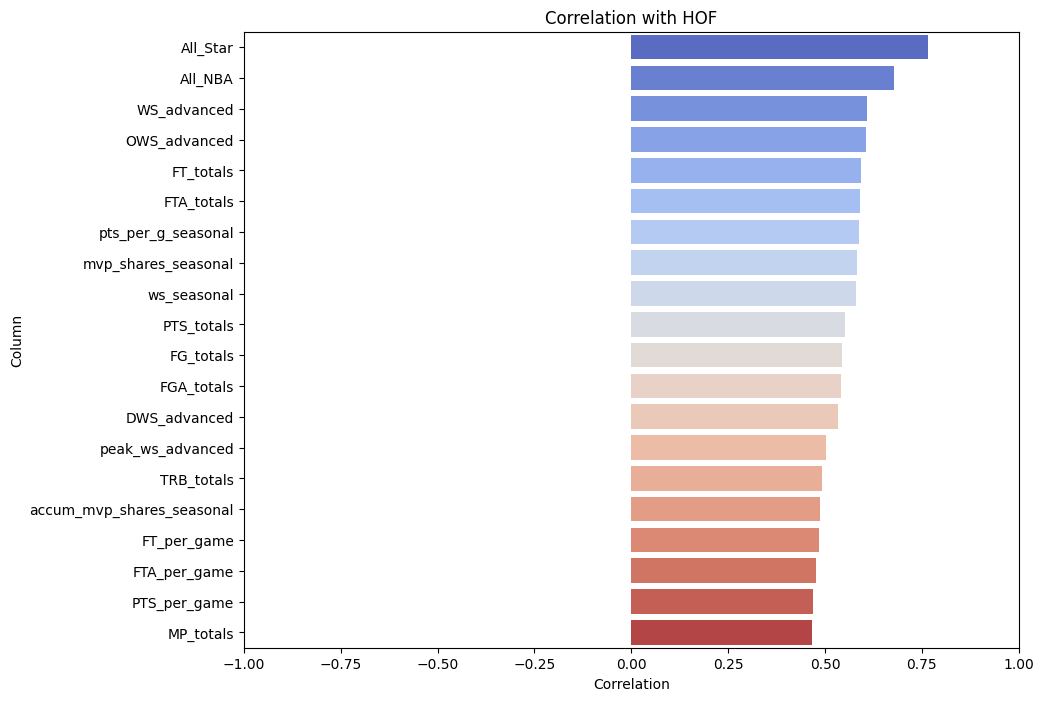

In [39]:
corr_table = train.corr()['Hall_of_Fame'].sort_values(key = abs, ascending=False)[1:]
highest_corr_cols = list(corr_table[:20].index)

corr_df = pd.DataFrame(corr_table.loc[highest_corr_cols]).reset_index()
corr_df.columns = ['Column', 'Correlation']

plt.figure(figsize=(10, 8))
sns.barplot(x = "Correlation", y = "Column", data = corr_df, palette = "coolwarm")
plt.title(f"Correlation with HOF")
plt.xlim(-1, 1)
plt.show()

In [40]:
col_to_plot = list(corr_table[:20].keys())

In [41]:
from sklearn.manifold import TSNE
import plotly.express as px

In [42]:
X_train = train.drop(columns = ["Hall_of_Fame"])
y_train = train[["Hall_of_Fame"]]

In [55]:
X_train

,MVP,Finals_MVP,NBA_Champ,All_NBA,All_Defensive,Def_POY,All_Star,Scoring_Champ,TRB_Champ,AST_Champ,...,Position_Center/Forward,Position_Forward,Position_Forward/Center,Position_Forward/Guard,Position_Guard,Position_Guard/Forward,Position_PointGuard,Position_PowerForward,Position_ShootingGuard,Position_SmallForward
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,6,2,6,15,11,0,19,2,1,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
5057,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5058,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
5060,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [43]:
tsne = TSNE(n_components = 2, random_state = 0)
projections = tsne.fit_transform(X_train)

ValueError: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [67]:
X = hof_data_2.drop(columns = [])

,Eligible,Hall_of_Fame,MVP,Finals_MVP,NBA_Champ,All_NBA,All_Defensive,Def_POY,All_Star,Scoring_Champ,...,Position_Center/Forward,Position_Forward,Position_Forward/Center,Position_Forward/Guard,Position_Guard,Position_Guard/Forward,Position_PointGuard,Position_PowerForward,Position_ShootingGuard,Position_SmallForward
0,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,6,2,6,15,11,0,19,2,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5058,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
5059,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5060,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False


# Modeling

In [88]:
X.fillna(X.mean(), inplace = True)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 69)

In [99]:
X_train.columns

Index(['MVP', 'Finals_MVP', 'NBA_Champ', 'All_NBA', 'All_Defensive', 'Def_POY',
       'All_Star', 'Scoring_Champ', 'TRB_Champ', 'AST_Champ', 'STL_Champ',
       'BLK_Champ', 'All_ABA', 'ABA_Champ', 'ROY', 'MP_per_game',
       'FG_per_game', 'FGA_per_game', '3P_per_game', '3PA_per_game',
       '2P_per_game', '2PA_per_game', 'FT_per_game', 'FTA_per_game',
       'ORB_per_game', 'DRB_per_game', 'TRB_per_game', 'AST_per_game',
       'STL_per_game', 'BLK_per_game', 'PTS_per_game', 'MP_totals', 'G_totals',
       'GS_totals', 'FG_totals', 'FGA_totals', 'FG%_totals', '3P_totals',
       '3PA_totals', '3P%_totals', '2P_totals', '2PA_totals', '2P%_totals',
       'eFG%_totals', 'FT_totals', 'FTA_totals', 'FT%_totals', 'ORB_totals',
       'DRB_totals', 'TRB_totals', 'AST_totals', 'STL_totals', 'BLK_totals',
       'PTS_totals', 'Trp_Dbl_totals', 'pts_per_g_seasonal',
       'mvp_shares_seasonal', 'trb_per_g_seasonal', 'ast_per_g_seasonal',
       'ws_seasonal', 'accum_mvp_shares_seasonal', 

## Logistic Regression

In [91]:

param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Algorithm to use in the optimization problem
    'class_weight': [None, 'balanced']  # Weights associated with classes
}

# Initialize the GridSearchCV object
grid_search_log_reg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                                   param_grid_log_reg, cv=5, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search_log_reg.fit(X_train, y_train.values.ravel())

# Get the best estimator
best_log_reg = grid_search_log_reg.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........C=0.01, class_weight=None, solver=liblinear; total time=   0.8s
[CV] END ........C=0.01, class_weight=None, solver=liblinear; total time=   0.6s
[CV] END ........C=0.01, class_weight=None, solver=liblinear; total time=   0.5s
[CV] END ........C=0.01, class_weight=None, solver=liblinear; total time=   0.5s
[CV] END ........C=0.01, class_weight=None, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ............C=0.01, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ............C=0.01, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ............C=0.01, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ............C=0.01, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ............C=0.01, class_weight=None, solver=lbfgs; total time=   0.7s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.6s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.5s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.5s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.6s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   0.7s
[CV] END .........C=0.1, class_weight=None, solver=liblinear; total time=   0.5s
[CV] END .........C=0.1, class_weight=None, solver=liblinear; total time=   0.6s
[CV] END .........C=0.1, class_weight=None, solver=liblinear; total time=   0.6s
[CV] END .........C=0.1, class_weight=None, solver=liblinear; total time=   0.6s
[CV] END .........C=0.1, class_weight=None, solver=liblinear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=0.1, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=0.1, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=0.1, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=0.1, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=0.1, class_weight=None, solver=lbfgs; total time=   0.7s
[CV] END .....C=0.1, class_weight=balanced, solver=liblinear; total time=   0.8s
[CV] END .....C=0.1, class_weight=balanced, solver=liblinear; total time=   1.1s
[CV] END .....C=0.1, class_weight=balanced, solver=liblinear; total time=   0.9s
[CV] END .....C=0.1, class_weight=balanced, solver=liblinear; total time=   1.7s
[CV] END .....C=0.1, class_weight=balanced, solver=liblinear; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=0.1, class_weight=balanced, solver=lbfgs; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=0.1, class_weight=balanced, solver=lbfgs; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=0.1, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=0.1, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=0.1, class_weight=balanced, solver=lbfgs; total time=   0.6s
[CV] END ...........C=1, class_weight=None, solver=liblinear; total time=   0.6s
[CV] END ...........C=1, class_weight=None, solver=liblinear; total time=   1.0s
[CV] END ...........C=1, class_weight=None, solver=liblinear; total time=   1.0s
[CV] END ...........C=1, class_weight=None, solver=liblinear; total time=   0.8s
[CV] END ...........C=1, class_weight=None, solver=liblinear; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............C=1, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............C=1, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............C=1, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............C=1, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...............C=1, class_weight=None, solver=lbfgs; total time=   1.1s
[CV] END .......C=1, class_weight=balanced, solver=liblinear; total time=   2.1s
[CV] END .......C=1, class_weight=balanced, solver=liblinear; total time=   2.5s
[CV] END .......C=1, class_weight=balanced, solver=liblinear; total time=   0.9s
[CV] END .......C=1, class_weight=balanced, solver=liblinear; total time=   1.2s
[CV] END .......C=1, class_weight=balanced, solver=liblinear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...........C=1, class_weight=balanced, solver=lbfgs; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...........C=1, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...........C=1, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...........C=1, class_weight=balanced, solver=lbfgs; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ...........C=1, class_weight=balanced, solver=lbfgs; total time=   1.7s
[CV] END ..........C=10, class_weight=None, solver=liblinear; total time=   1.1s
[CV] END ..........C=10, class_weight=None, solver=liblinear; total time=   1.1s
[CV] END ..........C=10, class_weight=None, solver=liblinear; total time=   1.8s
[CV] END ..........C=10, class_weight=None, solver=liblinear; total time=   1.2s
[CV] END ..........C=10, class_weight=None, solver=liblinear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............C=10, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............C=10, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............C=10, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............C=10, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..............C=10, class_weight=None, solver=lbfgs; total time=   0.7s
[CV] END ......C=10, class_weight=balanced, solver=liblinear; total time=   1.2s
[CV] END ......C=10, class_weight=balanced, solver=liblinear; total time=   1.5s
[CV] END ......C=10, class_weight=balanced, solver=liblinear; total time=   1.4s
[CV] END ......C=10, class_weight=balanced, solver=liblinear; total time=   1.3s
[CV] END ......C=10, class_weight=balanced, solver=liblinear; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   0.7s
[CV] END .........C=100, class_weight=None, solver=liblinear; total time=   0.7s
[CV] END .........C=100, class_weight=None, solver=liblinear; total time=   1.0s
[CV] END .........C=100, class_weight=None, solver=liblinear; total time=   0.8s
[CV] END .........C=100, class_weight=None, solver=liblinear; total time=   0.8s
[CV] END .........C=100, class_weight=None, solver=liblinear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=100, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=100, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=100, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=100, class_weight=None, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .............C=100, class_weight=None, solver=lbfgs; total time=   0.8s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   1.5s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   1.8s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   1.5s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   1.7s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



NameError: name 'X_test_scaled' is not defined

In [94]:
# Predict on the testing set using the best parameters
y_pred_best_log_reg = best_log_reg.predict(X_test)

# Evaluate the best model
accuracy_best_log_reg = accuracy_score(y_test, y_pred_best_log_reg)
roc_auc_best_log_reg = roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:, 1])
classification_summary_best_log_reg = classification_report(y_test, y_pred_best_log_reg)

print("Best Parameters:", grid_search_log_reg.best_params_)
print("Best Accuracy:", accuracy_best_log_reg)
print("Best ROC AUC Score:", roc_auc_best_log_reg)
print("Best Classification Report:\n", classification_summary_best_log_reg)

Best Parameters: {'C': 10, 'class_weight': None, 'solver': 'lbfgs'}
Best Accuracy: 0.9857142857142858
Best ROC AUC Score: 0.9898355595763929
Best Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       817
           1       0.87      0.57      0.68        23

    accuracy                           0.99       840
   macro avg       0.93      0.78      0.84       840
weighted avg       0.98      0.99      0.98       840



In [100]:
coefficients = best_log_reg.coef_[0]  # 'coef_' returns an array in shape (n_classes, n_features) if multi-class

# Create a DataFrame to view the feature names alongside their corresponding coefficients
feature_names = selected_features  # This should be the list of feature names used in the model
coefficients_df = pd.DataFrame(data={'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients DataFrame sorted by the coefficient values
coefficients_df.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients_df)

NameError: name 'selected_features' is not defined

In [98]:
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Initialize the GridSearchCV object with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train.values.ravel())  # Make sure your data is scaled if necessary, Random Forest does not require scaling though

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Predict on the testing set using the best parameters
y_pred_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
classification_summary_rf = classification_report(y_test, y_pred_rf)

print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_rf)
print("ROC AUC Score:", roc_auc_rf)
print("Classification Report:\n", classification_summary_rf)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_dep

LOG Reg with Feature Selection

In [101]:
from sklearn.feature_selection import RFE

In [102]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, C = 10)

In [ ]:
rfe = RFE(estimator=model, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train.values.ravel())

In [107]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

# Creating a DataFrame to display feature names and their selection status
selected_features = pd.Series(rfe.support_, index=X_train.columns)
selected_features_list = selected_features[selected_features == True]
print(selected_features_list)

Num Features: 10
Selected Features: [False  True  True False False  True  True False  True False False  True
 False False False False False False False  True False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False  True]
Feature Ranking: [40  1  1 13  9  1  1 37  1 57 72  1 10 51 44 16 19 26 20  1 42 15 25 31
 39 46 43  1 23 24 22 71 27 30 33 69 62 28 29 65 70 67  2 54 32 60 56 68
 47 59 55 73 52 34 18  6  8 36 17  7 41  5 53 38 21 14 48 35 45 12 11  3
  1 64 50 61 63 74 58 49  4 66  1]
Finals_MVP               True
NBA_Champ                True
Def_POY                  True
All_Star                 True
TRB_Champ                True
BLK_Champ                True
3PA_per

In [111]:
rfe_predict = rfe.predict(X_test)

# Evaluate the best model
accuracy_best_log_reg_fs = accuracy_score(y_test, rfe_predict)
roc_auc_best_log_reg_fs = roc_auc_score(y_test, rfe.predict_proba(X_test)[:, 1])
classification_summary_best_log_reg_fs = classification_report(y_test, rfe_predict)

print("Best Accuracy:", accuracy_best_log_reg_fs)
print("Best ROC AUC Score:", roc_auc_best_log_reg_fs)
print("Best Classification Report:\n", classification_summary_best_log_reg_fs)

Best Accuracy: 0.9892857142857143
Best ROC AUC Score: 0.9874940130913735
Best Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       817
           1       0.89      0.70      0.78        23

    accuracy                           0.99       840
   macro avg       0.94      0.85      0.89       840
weighted avg       0.99      0.99      0.99       840



In [112]:
import statsmodels.api as sm

In [120]:
y_train

,Hall_of_Fame
5045,0
268,0
4757,0
233,0
1568,0
...,...
4379,0
541,0
1964,0
3234,0


In [121]:
X_train_lr = X_train[['Finals_MVP', 'NBA_Champ', 'Def_POY', 'All_Star', 'TRB_Champ', 'BLK_Champ', '3PA_per_game', 'AST_per_game', 'Position_Center', 'Position_SmallForward']]

In [137]:
logit_model = sm.Logit(y_train,X_train_lr.astype(float))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.180062
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           Hall_of_Fame   No. Observations:                 3360
Model:                          Logit   Df Residuals:                     3350
Method:                           MLE   Df Model:                            9
Date:                Sat, 04 May 2024   Pseudo R-squ.:                 -0.1915
Time:                        02:55:00   Log-Likelihood:                -605.01
converged:                       True   LL-Null:                       -507.77
Covariance Type:            nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Finals_MVP                0.5479      1.207      0.454      0.650      -1.818       2

In [152]:
not_elig_2 = not_elig.drop(columns = ["Hall_of_Fame"])

In [154]:
not_elig_2.fillna(not_elig_2.mean())

,MVP,Finals_MVP,NBA_Champ,All_NBA,All_Defensive,Def_POY,All_Star,Scoring_Champ,TRB_Champ,AST_Champ,...,Position_Center/Forward,Position_Forward,Position_Forward/Center,Position_Forward/Guard,Position_Guard,Position_Guard/Forward,Position_PointGuard,Position_PowerForward,Position_ShootingGuard,Position_SmallForward
10,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
20,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
23,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
25,0,0,0,0,4,0,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
30,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5043,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5048,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5056,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [155]:
rfe_predict_ineligible = rfe.predict(not_elig_2)

ValueError: Input X contains NaN.
RFE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values